# Curva S-N para cargas totalmente invertidas en acero

In [49]:
import numpy as np
import math
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [51]:
#DATOS DE PROBLEMA
d=1 #in o mm #diametro o bien, la mayor longitud
Su=110 #ksi o Mpa #esfuerzo ultimo
Sy=77 #ksi o MPa #esfuerzo de cedencia
surface='machined' #tipo de superficie [opciones: mirror-polished, fine-ground, commercially polished, machined,                                              #cold-drawn, hot-rolled, as forged, corroded in tap water, corroded in salt water]
T=26.6667 #temperatura en F o en C. default = 80F o 26.66C
Conf=50 #confiabilidad en porcentaje, default = 50 [opciones: 50,90,95,99,99.9], (son porcentajes)
material='steel' #OJO POR AHORA SOLO SE PUEDE USAR CON ACERO
units='en' #'en' = ksi, farenheit, y pulgadas, 'metric' = MPa, celcius, y milimetros, opciones = ['metric' o 'en']

In [52]:
#conversion de unidades a inglesas
if units == 'metric':
    d=d*.0393701
    Su=Su*.145038
    Sy=Sy*.145038
    T=T*9/5+32

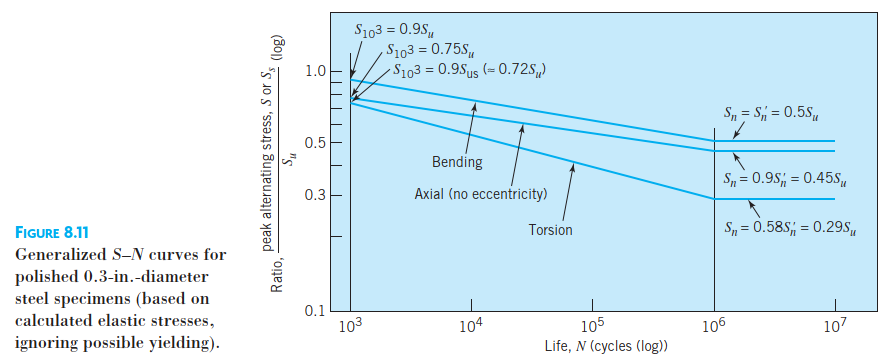

##### Endurance limit for $10^3$ cycles
$S_{10}3=.9*Su$ (for bending)

$S_{10}3=.75*Su$ (for axial)

$S_{10}3=.72*Su$ (for torsion)

##### Endurance limit for $10^6$ cycles (R.R. Moore endurance limit)
$S'_n=.5*Su$ (for steel only, lacking better data)

In [53]:
#Operaciones (tomadas de la grafica 8.11 Generalized S-N curves for polished .3 in diameter steel specimens)
S103bend=.9*Su #esfuerzo a los 10^3 ciclos
S103axial=.75*Su
S103torsion=.72*Su #(viene de que S10e3=.9Sus, igual que S103bend pero con el esfuerzo ultimo al cortante, que viene siendo masomenos igual a .72Su)
Spn= .5*Su #esfuerzo de moore (endurance limit) a los 10^6 ciclos

In [55]:
print('Limite de fatiga a los 10e3 ciclos, flexion={} ksi, or {} MPa'.format(round(S103bend,3),round(S103bend*6.89476,3)))
print('Limite de fatiga a los 10e3 ciclos, axial={} ksi, or {} MPa'.format(round(S103axial,3),round(S103axial*6.89476,3)))
print('Limite de fatiga a los 10e3 ciclos, torsion={} ksi, or {} MPa'.format(round(S103torsion,3),round(S103torsion*6.89476,3)))
print('Limite de fatiga a los 10e6 ciclos, flexion (prueba de moore) ={} ksi, or {} MPa'.format(round(Spn,3),round(Spn*6.89476,3)))

Limite de fatiga a los 10e3 ciclos, flexion=99.0 ksi, or 682.581 MPa
Limite de fatiga a los 10e3 ciclos, axial=82.5 ksi, or 568.818 MPa
Limite de fatiga a los 10e3 ciclos, torsion=79.2 ksi, or 546.065 MPa
Limite de fatiga a los 10e6 ciclos, flexion (prueba de moore) =55.0 ksi, or 379.212 MPa


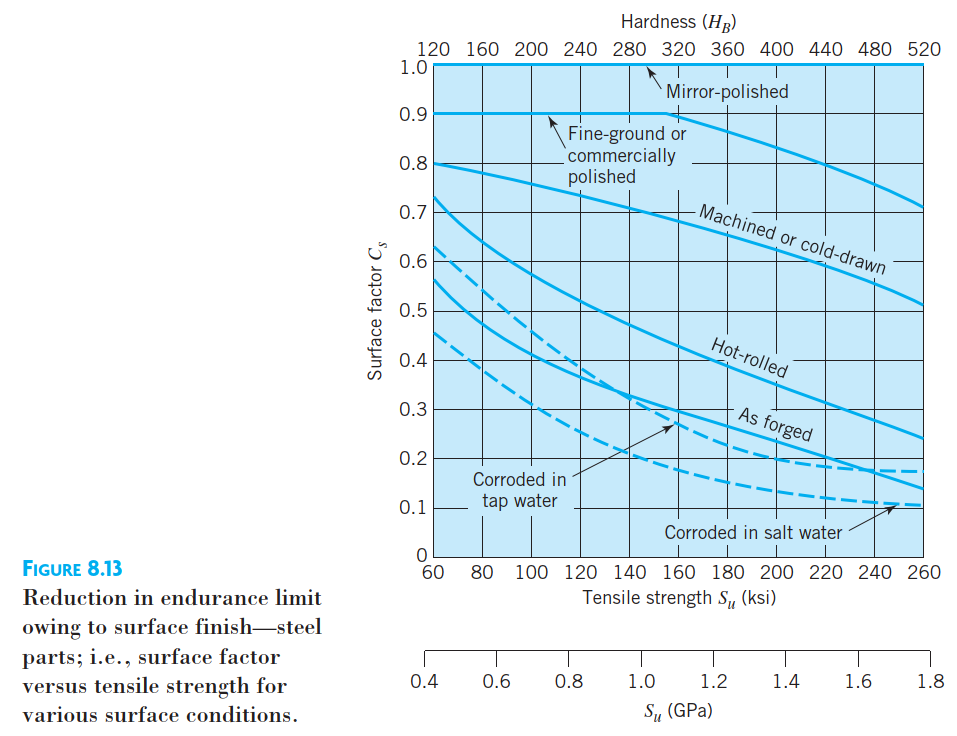

In [56]:
#Curvas de la figura 8.13
if 60<=Su and Su<260:
    if surface=='mirror-polished':
        Cs=1
    elif surface=='fine-ground' or surface=='commercially polished':
        if 60<=Su and Su<155:
            Cs=.9
        else:
            Cs=-(.00206*Su)**2+1
    elif surface=='machined' or surface=='cold-drawn':
        if 60<=Su and Su<140:
            Cs=-(.0023*Su)**2+.815
        else:
            Cs=-(.002*Su)**2+.787
    elif surface=='hot-rolled':
        if 60<=Su and Su<140:
            Cs=(.0037*Su-.8)**2+.39
        else:
            Cs=(.0016*Su-.9)**2+.01
    elif surface=='as forged':
        if 60<=Su and Su<110:
            Cs=(.0035*Su-.8)**2+.21
        else:
            Cs=-.0016*Su+.56
    elif surface=='corroded in tap water':
        Cs=(.0035*Su-.89)**2+.166
    elif surface=='corroded in salt water':
        Cs=(.0033*Su-.79)**2+.11
    else:
        Cs=float(input('Surface parameter (consider the ultimate strength is {} ksi and the surface is {}) ='.format(Su,surface)))       
else:
    Cs=float(input('Ultimate strength of {} ksi out of bounds, enter surface parameter manually'.format(Su)))
    
print('Cs = {}'.format(round(Cs,2)))

#OJO en caso de ser hierro gris fundido Cs=1 porque siempre hay microfisuras y por ende el acabo superficial no tiene efecto

Cs = 0.75


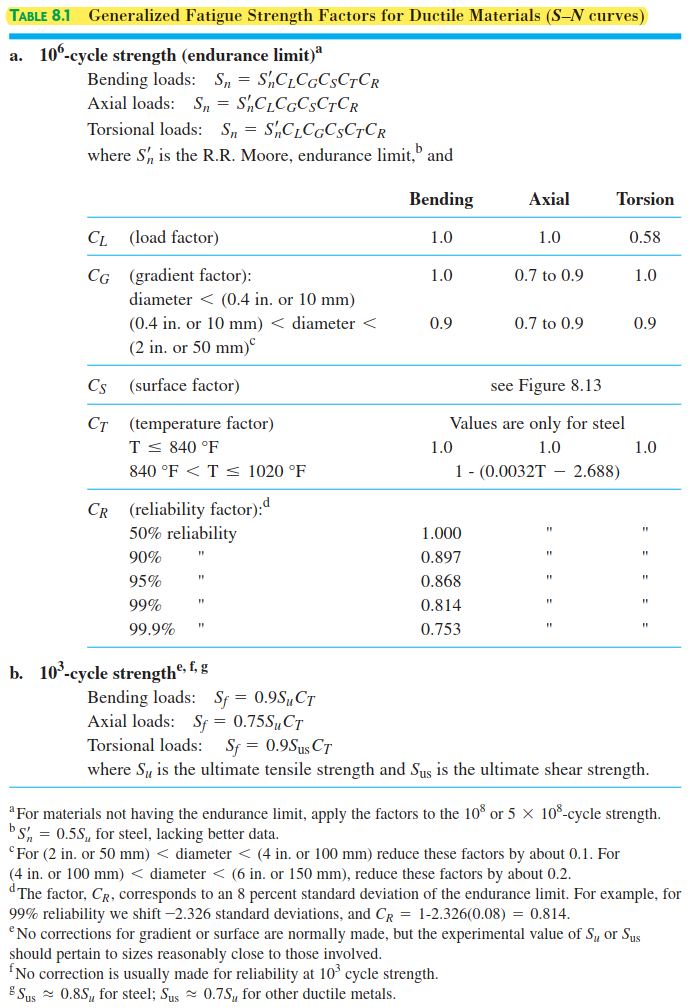

In [57]:
# OBTENCION DE FACTORES
Clbend=1
Claxial=1
Cltorsion=.58

#temperature factor
if T<=840:
    Ct=1.0
elif 840<T and T<1020:
    Ct=1-(.0032*T-2.688)
else:
    print('Temperature out of bounds (current temp: {} Farenheit)'.format(T))
    
#reliability factor
if Conf==50:
    Cr=1
elif Conf==90:
    Cr=.897
elif Conf==95:
    Cr=.868
elif Conf==99:
    Cr=.814
elif Conf==99.9:
    Cr=.753
else:
    print('Reliability factor out of bounds')

#gradient factor
if d<=.4 :
    Cgbend=1
    Cgaxial=.9
    Cgtorsion=1
elif .4<d and d<=2:
    Cgbend=.9
    Cgaxial=.8
    Cgtorsion=.9
elif 2<d and d<=4:
    Cgbend=.8
    Cgaxial=.7
    Cgtorsion=.8
elif 4<d and d<=6:
    Cgbend=.7
    Cgaxial=.6
    Cgtorsion=.7
else:
    print('Diameter out of range')
print('Factors are: BENDING: Cl={},    Cg={}, Cs={}, Ct={}, Cr={}'.format(Clbend, Cgbend, round(Cs,2), Ct, Cr))
print('Factors are: AXIAL:   Cl={},    Cg={}, Cs={}, Ct={}, Cr={}'.format(Claxial, Cgaxial, round(Cs,2), Ct, Cr))
print('Factors are: TORSION: Cl={}, Cg={}, Cs={}, Ct={}, Cr={}'.format(Cltorsion, Cgtorsion, round(Cs,2), Ct, Cr))

Factors are: BENDING: Cl=1,    Cg=0.9, Cs=0.75, Ct=1.0, Cr=1
Factors are: AXIAL:   Cl=1,    Cg=0.8, Cs=0.75, Ct=1.0, Cr=1
Factors are: TORSION: Cl=0.58, Cg=0.9, Cs=0.75, Ct=1.0, Cr=1


##### $10^6$-cycle strength (endurance limit)
$S_n=S'_n*C_L*C_G*C_S*C_T*C_R$ (for bending, axial, and torsional, using the corresponding coefficients)

In [58]:
Snbend=Spn*Clbend*Cgbend*Cs*Ct*Cr
Snaxial=Spn*Claxial*Cgaxial*Cs*Ct*Cr
Sntorsion=Spn*Cltorsion*Cgtorsion*Cs*Ct*Cr
print('Maximo esfuerzo posible a 10^6 ciclos para acero, en flexion pura  = {} ksi, o bien, {} MPa'.format(round(Snbend, 3), round(Snbend*6.89476, 3)))
print('Maximo esfuerzo posible a 10^6 ciclos para acero, en axial  = {} ksi, o bien, {} MPa'.format(round(Snaxial, 3), round(Snaxial*6.89476, 3)))
print('Maximo esfuerzo posible a 10^6 ciclos para acero, en torsion"  = {} ksi, o bien, {} MPa'.format(round(Sntorsion, 3), round(Sntorsion*6.89476, 3)))

Maximo esfuerzo posible a 10^6 ciclos para acero, en flexion pura  = 37.174 ksi, o bien, 256.306 MPa
Maximo esfuerzo posible a 10^6 ciclos para acero, en axial  = 33.044 ksi, o bien, 227.828 MPa
Maximo esfuerzo posible a 10^6 ciclos para acero, en torsion"  = 21.561 ksi, o bien, 148.658 MPa


In [59]:
#obtencion de la curva S-N calculada, o bien, regresion lineal para cierto valor
cycles=float(input('Numero de ciclos para el cual se desea saber el esfuerzo máximo permisible = '))

Numero de ciclos para el cual se desea saber el esfuerzo máximo permisible = 6e4


In [60]:
if 1e3<cycles<1e6:
    xbend=np.array([math.log10(1e3),math.log10(1e6)]).reshape(-1,1) #el 3 y el 6 vienen de log10(10e3 ciclos) y log10(10e6 ciclos)
    ybend=np.array([math.log10(S103bend*1000),math.log10(Snbend*1000)]).reshape(-1,1)
    olsbend = linear_model.LinearRegression()
    modelbend = olsbend.fit(xbend, ybend)
    Scyclesbend=(10**modelbend.intercept_[0])*(cycles**modelbend.coef_[0][0])/1000
    print('Maximo esfuerzo posible a {} ciclos para acero, en flexion pura  = {} ksi, o bien, {} MPa'.format(cycles,round(Scyclesbend, 3),round(Scyclesbend*6.89476, 3)))

    xaxial=np.array([math.log10(1e3),math.log10(1e6)]).reshape(-1,1) #el 3 y el 6 vienen de log10(10e3 ciclos) y log10(10e6 ciclos)
    yaxial=np.array([math.log10(S103axial*1000),math.log10(Snaxial*1000)]).reshape(-1,1)
    olsaxial = linear_model.LinearRegression()
    modelaxial = olsaxial.fit(xaxial, yaxial)
    Scyclesaxial=(10**modelaxial.intercept_[0])*(cycles**modelaxial.coef_[0][0])/1000
    print('Maximo esfuerzo posible a {} ciclos para acero, en axial pura  = {} ksi, o bien, {} MPa'.format(cycles,round(Scyclesaxial, 3),round(Scyclesaxial*6.89476, 3)))

    xtorsion=np.array([math.log10(1e3),math.log10(1e6)]).reshape(-1,1) #el 3 y el 6 vienen de log10(10e3 ciclos) y log10(10e6 ciclos)
    ytorsion=np.array([math.log10(S103torsion*1000),math.log10(Sntorsion*1000)]).reshape(-1,1)
    olstorsion = linear_model.LinearRegression()
    modeltorsion = olstorsion.fit(xtorsion, ytorsion)
    Scyclestorsion=(10**modeltorsion.intercept_[0])*(cycles**modeltorsion.coef_[0][0])/1000
    print('Maximo esfuerzo posible a {} ciclos para acero, en torsion pura  = {} ksi, o bien {} MPa'.format(cycles,round(Scyclestorsion, 3),round(Scyclestorsion*6.89476, 3)))
else:
    print('Los ciclos no estan en el rango')

Maximo esfuerzo posible a 60000.0 ciclos para acero, en flexion pura  = 55.398 ksi, o bien, 381.958 MPa
Maximo esfuerzo posible a 60000.0 ciclos para acero, en axial pura  = 47.965 ksi, o bien, 330.71 MPa
Maximo esfuerzo posible a 60000.0 ciclos para acero, en torsion pura  = 36.627 ksi, o bien 252.537 MPa


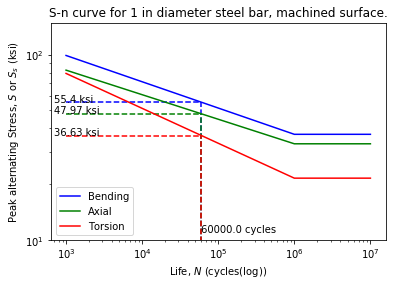

In [61]:
if units== 'en':
    fig, ax = plt.subplots()
    N=[1e3, 1e6, 1e7]
    plt.plot(N,[S103bend, Snbend, Snbend], label='Bending', color='b')
    plt.plot(N,[S103axial, Snaxial, Snaxial], label='Axial', color='g')
    plt.plot(N,[S103torsion, Sntorsion, Sntorsion], label='Torsion',color='r')
    ax.hlines(y=Scyclesbend, xmin=N[0], xmax=cycles, color='b', linestyles='--')
    ax.vlines(x=cycles, ymin=1, ymax=Scyclesbend, color='b', linestyles='--')
    ax.hlines(y=Scyclesaxial, xmin=N[0], xmax=cycles, color='g', linestyles='--')
    ax.vlines(x=cycles, ymin=1, ymax=Scyclesaxial, color='g', linestyles='--')
    ax.hlines(y=Scyclestorsion, xmin=N[0], xmax=cycles, color='r', linestyles='--')
    ax.vlines(x=cycles, ymin=1, ymax=Scyclestorsion, color='r', linestyles='--')

    plt.yscale('log')
    plt.xscale('log')
    plt.title('S-n curve for {} in diameter {} bar, {} surface.'.format(d, material, surface))
    plt.xlabel('Life, $N$ (cycles(log))')
    plt.ylabel('Peak alternating Stress, $S$ or $S_s$ (ksi)')
    plt.ylim(10,S103bend+50)
    plt.legend(loc='lower left')
    plt.text(7e2, Scyclesbend, '{} ksi' .format(round(Scyclesbend, 2)))
    plt.text(7e2, Scyclesaxial, '{} ksi' .format(round(Scyclesaxial, 2)))
    plt.text(7e2, Scyclestorsion, '{} ksi' .format(round(Scyclestorsion, 2)))
    plt.text(cycles, 11, '{} cycles' .format(round(cycles, 0)))
else:
    fig, ax = plt.subplots()
    N=[1e3, 1e6, 1e7]
    plt.plot(N,[S103bend*6.89476, Snbend*6.89476, Snbend*6.89476], label='Bending', color='b')
    plt.plot(N,[S103axial*6.89476, Snaxial*6.89476, Snaxial*6.89476], label='Axial', color='g')
    plt.plot(N,[S103torsion*6.89476, Sntorsion*6.89476, Sntorsion*6.89476], label='Torsion',color='r')
    ax.hlines(y=Scyclesbend*6.89476, xmin=N[0], xmax=cycles, color='b', linestyles='--')
    ax.vlines(x=cycles, ymin=1, ymax=Scyclesbend*6.89476, color='b', linestyles='--')
    ax.hlines(y=Scyclesaxial*6.89476, xmin=N[0], xmax=cycles, color='g', linestyles='--')
    ax.vlines(x=cycles, ymin=1, ymax=Scyclesaxial*6.89476, color='g', linestyles='--')
    ax.hlines(y=Scyclestorsion*6.89476, xmin=N[0], xmax=cycles, color='r', linestyles='--')
    ax.vlines(x=cycles, ymin=1, ymax=Scyclestorsion*6.89476, color='r', linestyles='--')

    plt.yscale('log')
    plt.xscale('log')
    plt.title('S-n curve for {} in diameter {} bar, {} surface.'.format(round(d,2), material, surface))
    plt.xlabel('Life, $N$ (cycles(log))')
    plt.ylabel('Peak alternating Stress, $S$ or $S_s$ (Mpa)')
    plt.ylim(100,S103bend*6.89476+50)
    plt.legend(loc='lower left')
    plt.text(7e2, Scyclesbend*6.89476, '{} MPa' .format(round(Scyclesbend*6.89476, 2)))
    plt.text(7e2, Scyclesaxial*6.89476, '{} MPa' .format(round(Scyclesaxial*6.89476, 2)))
    plt.text(7e2, Scyclestorsion*6.89476, '{} MPa' .format(round(Scyclestorsion*6.89476, 2)))
    plt.text(cycles, 110, '{} cycles' .format(round(cycles, 0)))

In [62]:
if units=='en':
    df=pd.DataFrame ({'Tipo de carga':['Flexion', 'Axial', 'Torsion'],
               'Limite de fatiga a los 10^6 ciclos (MPa) $S_{10e6}$':[Snbend, Snaxial, Sntorsion],
               'Limite de fatiga a los 10^3 ciclos(MPa) $S_{10e3}$':[S103bend, S103axial, S103torsion],
               'Limite de fatiga a los {:.1} ciclos(MPa) $S_N$'.format(cycles):[Scyclesbend, Scyclesaxial, Scyclestorsion]})
    df.set_index('Tipo de carga',inplace=True)

if units=='metric':
    df=pd.DataFrame ({'Tipo de carga':['Flexion', 'Axial', 'Torsion'],
               'Limite de fatiga a los 10^6 ciclos (MPa) $S_{10e6}$':[Snbend*6.89476, Snaxial*6.89476, Sntorsion*6.89476],
               'Limite de fatiga a los 10^3 ciclos(MPa) $S_{10e3}$':[S103bend*6.89476, S103axial*6.89476, S103torsion*6.89476],
               'Limite de fatiga a los {:.1} ciclos(MPa) $S_N$'.format(cycles):[Scyclesbend*6.89476, Scyclesaxial*6.89476, Scyclestorsion*6.89476]})
    df.set_index('Tipo de carga',inplace=True)

df.style.set_table_styles([dict(selector="th",props=[('max-width', '100px')])]).format('{:.01f}')

,Limite de fatiga a los 10^6 ciclos (MPa) $S_{10e6}$,Limite de fatiga a los 10^3 ciclos(MPa) $S_{10e3}$,Limite de fatiga a los 6e+04 ciclos(MPa) $S_N$
Tipo de carga,,,
Flexion,37.2,99.0,55.4
Axial,33.0,82.5,48.0
Torsion,21.6,79.2,36.6


In [63]:
# Datos para realizar los calculos con esfuerzo medio
if units== 'en':
    print('Su={}  #esfuerzo ultimo, en ksi'.format(round(Su,3)))
    print('Sy={} #esfuerzo de cedencia, en ksi'.format(round(Sy,3)))
    print('Snbend={} #Maximo esfuerzo posible a 10^6, en caso de carga "flexion pura", ksi'.format(round(Snbend,3)))
    print('Snaxial={} #Maximo esfuerzo posible a 10^6 ciclos, en caso de carga "axial pura", ksi'.format(round(Snaxial,3)))
    print('Sntorsion={} #Maximo esfuerzo posible a 10^6 ciclos, en caso de carga "torsion pura", ksi'.format(round(Sntorsion,3)))
    print('cycles={} #Numero de ciclos para el cual se desea saber el esfuerzo máximo permisible'.format(cycles))
    print('Scyclesbend={} #Maximo esfuerzo posible a {} ciclos, en caso de carga "flexion pura", ksi'.format(round(Scyclesbend,3), cycles))
    print('Scyclesaxial={} #Maximo esfuerzo posible a {} ciclos, en caso de carga "axial pura", ksi'.format(round(Scyclesaxial,3), cycles))
    print('Scyclestorsion={} #Maximo esfuerzo posible a {} ciclos, en caso de carga "torsion pura", ksi'.format(round(Scyclestorsion,3), cycles))
    print('casocarga={}'.format("'zero-to-maximum'"))
    print("units='{}'".format(units))

else:
    print('Su={}  #esfuerzo ultimo, en MPa'.format(round(Su*6.89476,3)))
    print('Sy={} #esfuerzo de cedencia, en MPa'.format(round(Sy*6.89476,3)))
    print('Snbend={} #Maximo esfuerzo posible a 10^6, en caso de carga "flexion pura", MPa'.format(round(Snbend*6.89476,3)))
    print('Snaxial={} #Maximo esfuerzo posible a 10^6 ciclos, en caso de carga "axial pura", MPa'.format(round(Snaxial*6.89476,3)))
    print('Sntorsion={} #Maximo esfuerzo posible a 10^6 ciclos, en caso de carga "torsion pura", MPa'.format(round(Sntorsion*6.89476,3)))
    print('cycles={} #Numero de ciclos para el cual se desea saber el esfuerzo máximo permisible'.format(cycles))
    print('Scyclesbend={} #Maximo esfuerzo posible a {} ciclos, en caso de carga "flexion pura", MPa'.format(round(Scyclesbend*6.89476,3), cycles))
    print('Scyclesaxial={} #Maximo esfuerzo posible a {} ciclos, en caso de carga "axial pura", MPa'.format(round(Scyclesaxial*6.89476,3), cycles))
    print('Scyclestorsion={} #Maximo esfuerzo posible a {} ciclos, en caso de carga "torsion pura", MPa'.format(round(Scyclestorsion*6.89476,3), cycles))
    print('casocarga={}'.format("'zero-to-maximum'"))
    print("units='{}'".format(units))

Su=110  #esfuerzo ultimo, en ksi
Sy=77 #esfuerzo de cedencia, en ksi
Snbend=37.174 #Maximo esfuerzo posible a 10^6, en caso de carga "flexion pura", ksi
Snaxial=33.044 #Maximo esfuerzo posible a 10^6 ciclos, en caso de carga "axial pura", ksi
Sntorsion=21.561 #Maximo esfuerzo posible a 10^6 ciclos, en caso de carga "torsion pura", ksi
cycles=60000.0 #Numero de ciclos para el cual se desea saber el esfuerzo máximo permisible
Scyclesbend=55.398 #Maximo esfuerzo posible a 60000.0 ciclos, en caso de carga "flexion pura", ksi
Scyclesaxial=47.965 #Maximo esfuerzo posible a 60000.0 ciclos, en caso de carga "axial pura", ksi
Scyclestorsion=36.627 #Maximo esfuerzo posible a 60000.0 ciclos, en caso de carga "torsion pura", ksi
casocarga='zero-to-maximum'
units='en'
